Warmup
It's another day at the office at Big Research Co ™. You look up from your laptop and see a woman in a lab coat standing in front of your desk.

"I need some help" she says. "We lost some subjects from the trial."

She notices a curious look on your face. "Not like that, they just ran away. We didn't lock the doors soon enough."

"Anyway, there's probably like a 70%, no maybe 80%, no, let's say 90% chance that a given subject will stick around, and I need to run the study again with 10, or 20 subjects. We need to gather enough data on them to justify the cost, so I need you to figure out what are the probabilities are that at least half of them stick around, only 1 person leaves, and that all the subjects stay."

She sees you start to form another question and cuts you off.

"Don't ask. You really don't want to know."

What probability distribution would you use to model the scenario outlined above?
Calculate all the requested probabilities. Use all the possible combinations of subject count and chance that a subject will stay in the study.
Bonus: visualize the requested probabilities.
Hints
Use scipy.stats for this.
A fancy list comprehension or the itertools module can help you find all the possible combinations.
Each distribution has a cumulative density function that tells you the likelihood that a value falls at or below a given point.
Consider storing the results of your calculations in a data frame.

In [1]:
import scipy.stats
import itertools
import numpy as np

In [2]:
count = 20
p = .9
# prob_half = ?
# prob_one_leaves = ?
# prob_all = ?

In [5]:
n, p = 10, .9  # number of trials, probability of each trial
s = np.random.binomial(n, p, count)
# result of 10 people staying out of 20 people.
s

array([10,  9, 10, 10, 10,  9,  9,  9,  9,  9, 10, 10, 10,  8, 10, 10,  8,
       10,  9,  9])

In [6]:
count = 20
p = .9
n = 10
sum(np.random.binomial(n, p, 20000) == 0)/20000

0.0

The binomial distribution model deals with finding the probability of success of an event which has only two possible outcomes in a series of experiments. For example, tossing of a coin always gives a head or a tail. The probability of finding exactly 3 heads in tossing a coin repeatedly for 10 times is estimated during the binomial distribution.

We use the seaborn python library which has in-built functions to create such probability distribution graphs. Also, the scipy package helps is creating the binomial distribution.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

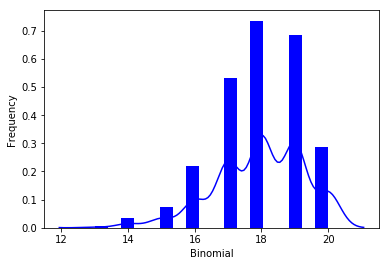

In [8]:
# 10 OUT OF 20 STAY
from scipy.stats import binom
import seaborn as sb

binom.rvs(size=10,n=20,p=0.9)

data_binom = binom.rvs(n=20,p=0.9,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

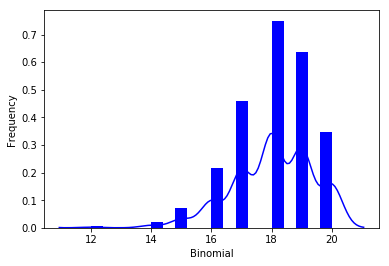

In [9]:
# 19 OUT OF 20 STAY
from scipy.stats import binom
import seaborn as sb

binom.rvs(size=19,n=20,p=0.9)

data_binom = binom.rvs(n=20,p=0.9,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

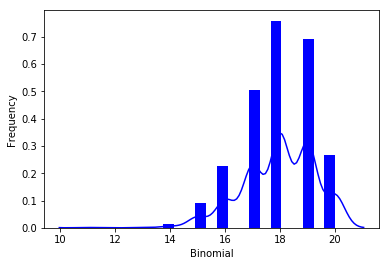

In [12]:
# ALL STAY
from scipy.stats import binom
import seaborn as sb

binom.rvs(size=20,n=20,p=0.9)

data_binom = binom.rvs(n=20,p=0.9,loc=0,size=1000)
# print(data_binom)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

# Zach's answer:

In [14]:
from scipy import stats
import pandas as pd

n = 10
p = .9

stats.binom.pmf(n=10, p=.9, k=10)

0.34867844010000004

In [15]:
stats.binom.cdf(n=20, p=.8, k=19) # 99% chance that 19 or fewer subjects stick around

0.9884707849539315

In [16]:
stats.binom.cdf(n=20, p=.8, k=20) # 100% chance that 20 or fewer subjects stick around

1.0

In [17]:
stats.binom.pmf(n=20, p=.8, k=20) # 1% chance that all 20 subjects stick around

0.011529215046068481

In [19]:
stats.binom.cdf(n=10, p=.8, k=5) # 3% chance that 10 or fewer subjects stick around

0.032793497599999964

In [22]:
1 - stats.binom.cdf(n=10, p=.8, k=5) # 97% chance that more than 10 subjects stick around
                                    # (survival function)

0.9672065024000001

In [23]:
stats.binom.sf(n=10, p=.8, k=5) # survival function

0.9672065024000001

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

    n_subjects_that_stay       pmf       cdf
0                      0  0.000006  0.000006
1                      1  0.000138  0.000144
2                      2  0.001447  0.001590
3                      3  0.009002  0.010592
4                      4  0.036757  0.047349
5                      5  0.102919  0.150268
6                      6  0.200121  0.350389
7                      7  0.266828  0.617217
8                      8  0.233474  0.850692
9                      9  0.121061  0.971752
10                    10  0.028248  1.000000


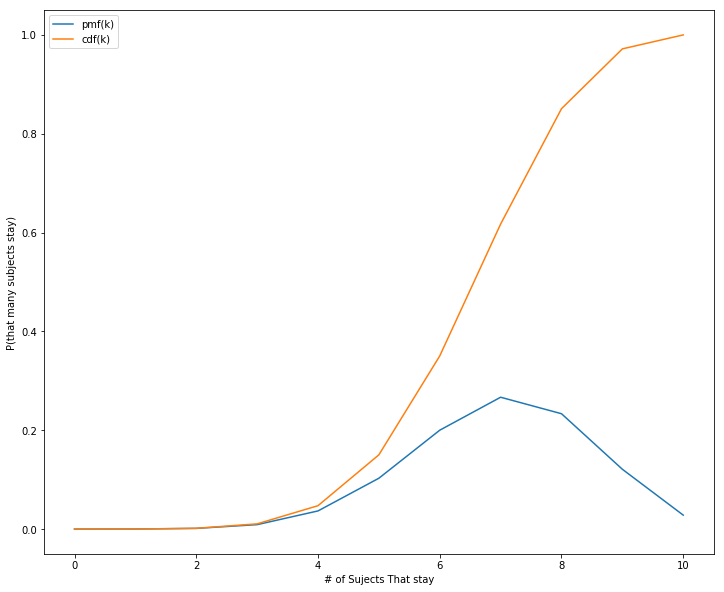

In [40]:
n_subjects = 10
p_subject_stays = .7
n_subjects_that_stay = range(11)

# probability that a given number of subjects stick around
pmfs = [stats.binom.pmf(n=n_subjects, p=p_subject_stays, k=k) for k in n_subjects_that_stay]

df = pd.DataFrame(dict(n_subjects_that_stay=n_subjects_that_stay, pmf=pmfs))
df['cdf'] = df.n_subjects_that_stay.apply(lambda k:stats.binom.cdf(p=p_subject_stays, n=n_subjects, k=k))
print(df)

plt.figure(figsize=(12,10))
plt.plot(df.n_subjects_that_stay, df.pmf, label='pmf(k)')
plt.plot(df.n_subjects_that_stay, df.cdf, label='cdf(k)')
plt.ylabel('P(that many subjects stay)')
plt.xlabel('# of Sujects That stay')
plt.legend()